In [1]:
%config Completer.use_jedi = False

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.max_rows', None)
# pd.reset_option('^display.', silent=True)

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.shape # 4323 rows, 9 columns

(4324, 9)

In [8]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [9]:
df_data.head()

Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   
2           2             2       SpaceX   
3           3             3    Roscosmos   
4           4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

Looks like the columns 'Unnamed:0' and 'Unnamed: 0.1' are simply index values, which is junk data.

In [10]:
df_data.duplicated().any() #No duplicate

False

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [12]:
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

A couple of data types need to be changed: Date to datetime and price to float

In [13]:
df_data['Date'] = pd.to_datetime(df_data.Date, utc=True)
df_data['Price'] = df_data.Price.str.replace(',', '')
df_data['Price'] = pd.to_numeric(df_data.Price)

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [15]:
df_non_numeric = df_data.drop(['Price'], axis=1)

## Descriptive Statistics

In [16]:
df_non_numeric.describe(datetime_is_numeric=True)

Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   
mean            NaN                                         NaN   
min             NaN                                         NaN   
25%             NaN                                         NaN   
50%             NaN                                         NaN   
75%             NaN                                         NaN   
max             NaN                                         NaN   

                                       Date  \
count                                  4324   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean    1987-11-28 17:10:45.735430208+00:00   
min               1957-10-04 19:28:00+00:00   
25%               1972-04-20 07:28:30+00:00   
50%               1984-12-17 00:17:30+00:00   
75%               2002-09-10 20:50:45+00:00   
max               2020-08-07 05:12:00+00:00   

                                     Detail  Rocket_Status Mission_Status  
count                                  4324           4324           4324  
unique                                 4278              2              4  
top     Cosmos-3MRB (65MRB) | BOR-5 Shuttle  StatusRetired        Success  
freq                                      6           3534           3879  
mean                                    NaN            NaN            NaN  
min                                     NaN            NaN            NaN  
25%                                     NaN            NaN            NaN  
50%                                     NaN            NaN            NaN  
75%                                     NaN            NaN            NaN  
max                                     NaN            NaN            NaN

In [17]:
df_data.describe()

Price
count   964.00
mean    153.79
std     288.45
min       5.30
25%      40.00
50%      62.00
75%     164.00
max   5,000.00

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [18]:
org_missions = df_data['Organisation'].value_counts()

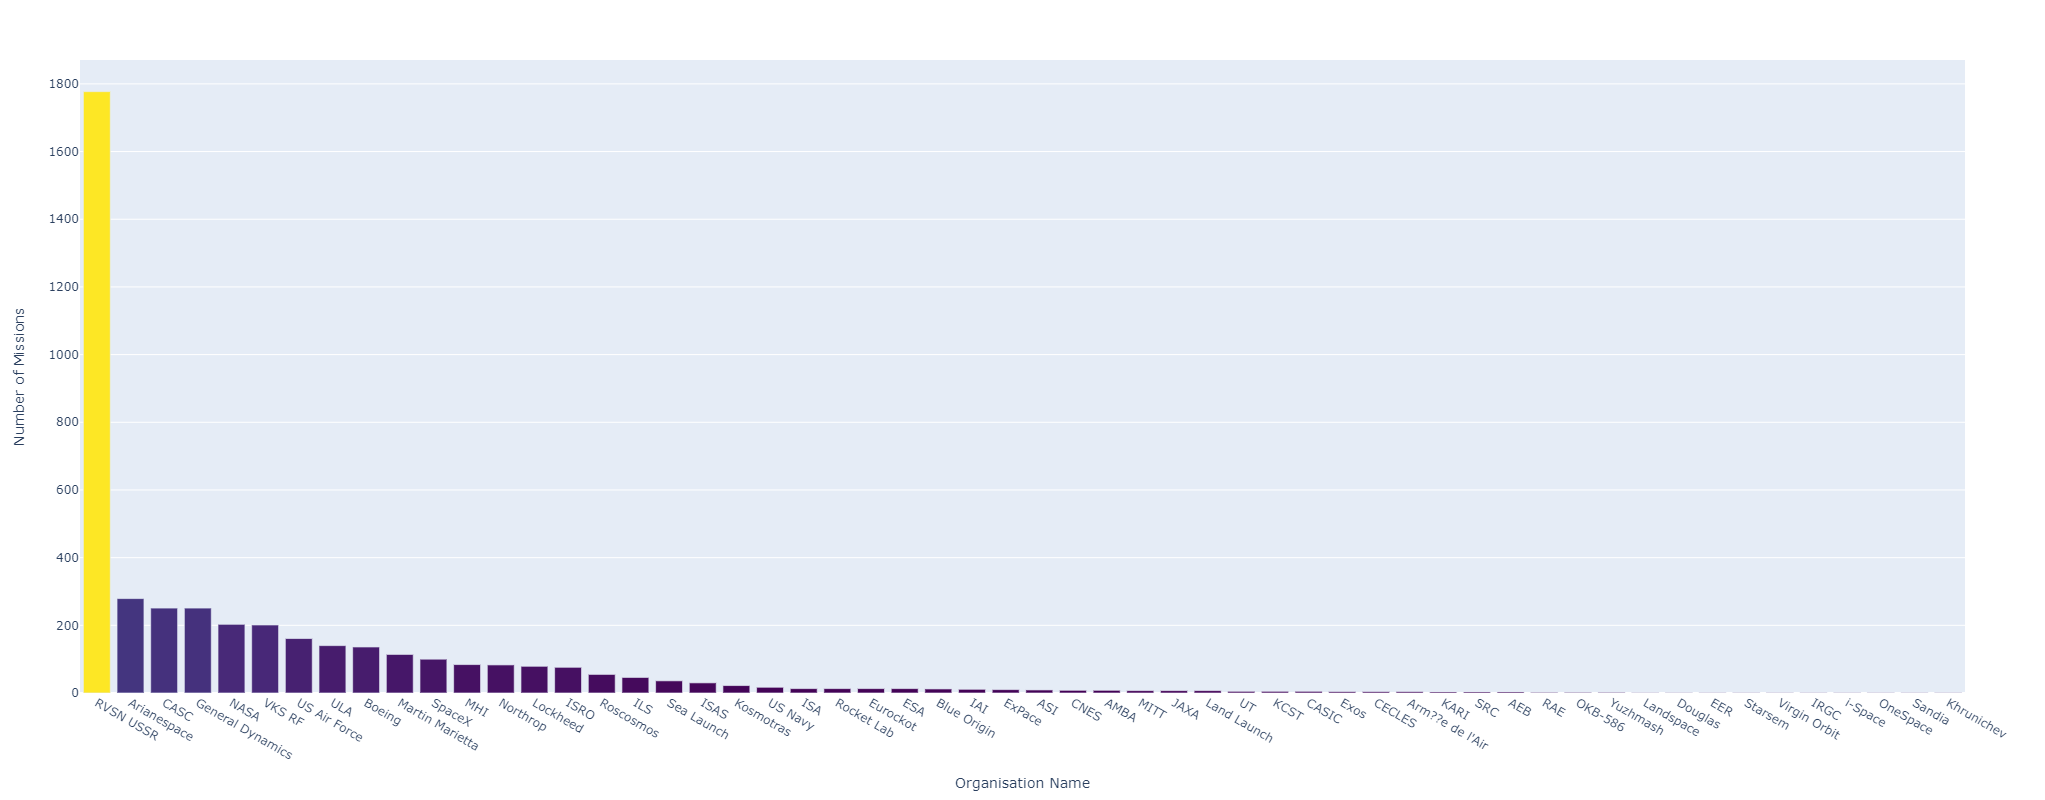

In [19]:
bar = px.bar(org_missions,
             x=org_missions.index,
             y=org_missions.values,
             color=org_missions.values,
             color_continuous_scale='Viridis',
             height=800)

bar.update_layout(xaxis_title='Organisation Name',
                  yaxis_title='Number of Missions',
                  coloraxis_showscale=False)

bar.show()

The RVSN USSR is by far the organisation with the most missions at 1,777 missions! At the second place, Arianespace only have 279 missions. Interesting.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [20]:
df_data.groupby('Rocket_Status').count()

Organisation  Location  Date  Detail  Price  Mission_Status
Rocket_Status                                                             
StatusActive            790       790   790     790    586             790
StatusRetired          3534      3534  3534    3534    378            3534

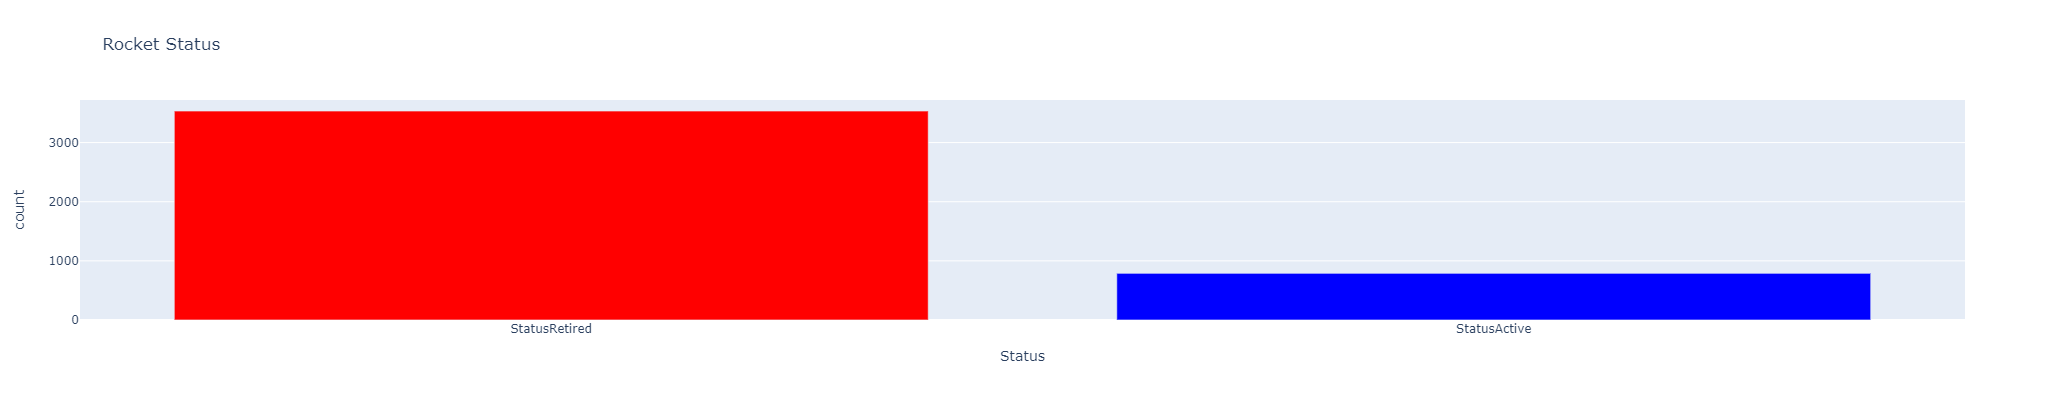

In [21]:
rocket_stat_count = df_data.Rocket_Status.value_counts()

fig = px.bar(rocket_stat_count,
             x=rocket_stat_count.index,
             y=rocket_stat_count.values,
             color=rocket_stat_count.values,
             color_continuous_scale='bluered',
             height=400,
             width=400,
             title='Rocket Status')

fig.update_layout(coloraxis_showscale=False,
                  yaxis_title='count',
                  xaxis_title='Status')

fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

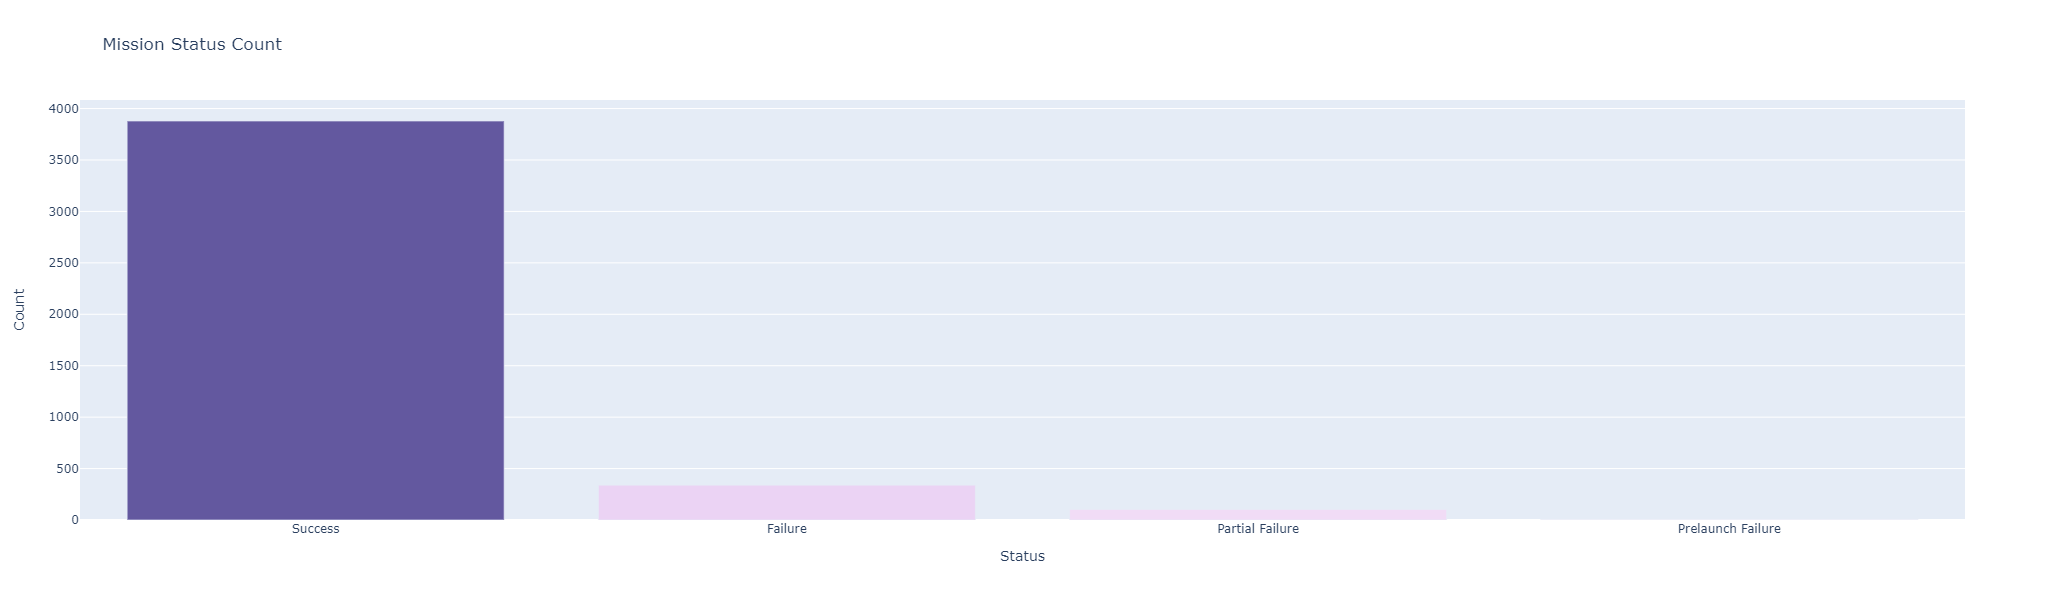

In [22]:
mission_status = df_data.Mission_Status.value_counts()

bar = px.bar(mission_status,
             x=mission_status.index,
             y=mission_status.values,
             color=mission_status.values,
             color_continuous_scale='purp',
             height=600,
             width=600,
             title='Mission Status Count')

bar.update_layout(xaxis_title='Status',
                  yaxis_title='Count',
                  coloraxis_showscale=False)
bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [23]:
prices = df_data.Price.dropna() # drop the NaN values

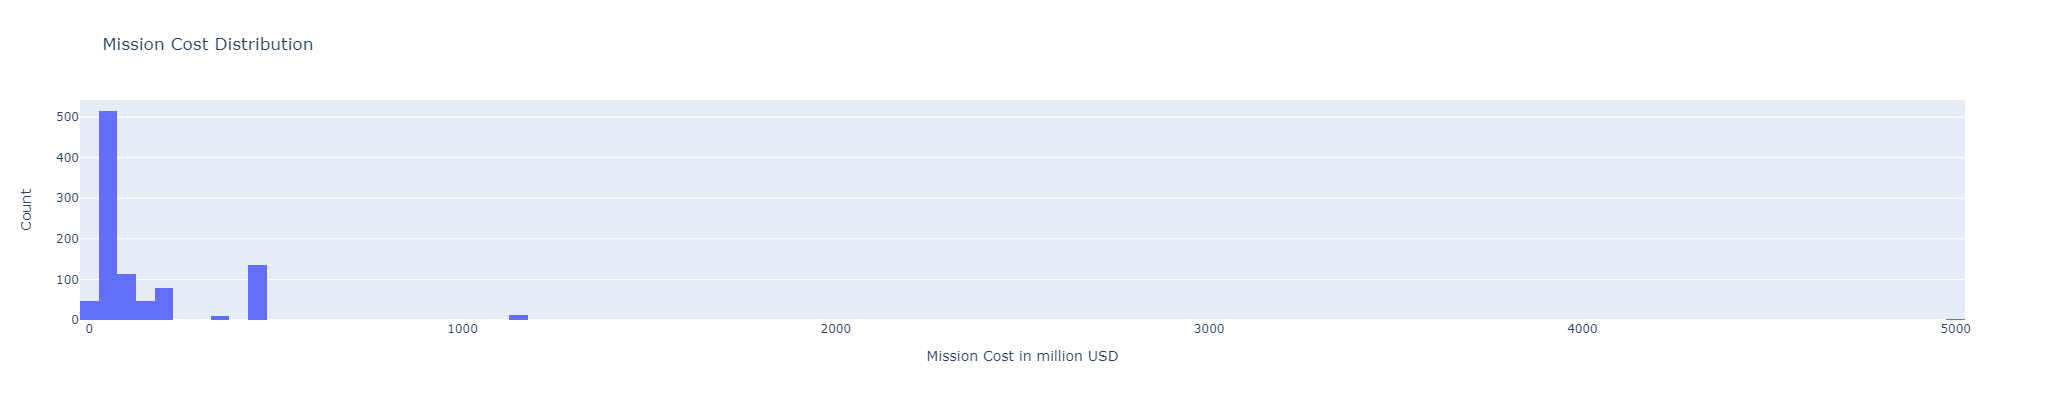

In [24]:
# plot the distribution
hist = px.histogram(prices,
                    height=400,
                    width=1000,
                    title='Mission Cost Distribution')

hist.update_layout(xaxis_title='Mission Cost in million USD',
                   yaxis_title='Count',
                   showlegend=False)
hist.show()

It appears that most mission's price are well below 1billion USD with most of them being around 25-75m USD. 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [25]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                       Date                                        Detail  \
0 2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive  65.00        Success  
4  StatusActive 145.00        Success

Upon testing the <code>countries.get('country_name')</code> from iso3166 library. Some countries return an error.
This is because the names in our dataset doesn't match the names in iso3166 library, such as:
* South Korea is 'Korea, Republic of'
* North Korea is 'Korea, Democratic People's Republic of'

There aren't too many unique countries in our datasets, I will simply change the names accordingly. 

In [26]:
# check what the iso3166 name is
for c in countries:
    print(c)

Country(name='Afghanistan', alpha2='AF', alpha3='AFG', numeric='004', apolitical_name='Afghanistan')
Country(name='Åland Islands', alpha2='AX', alpha3='ALA', numeric='248', apolitical_name='Åland Islands')
Country(name='Albania', alpha2='AL', alpha3='ALB', numeric='008', apolitical_name='Albania')
Country(name='Algeria', alpha2='DZ', alpha3='DZA', numeric='012', apolitical_name='Algeria')
Country(name='American Samoa', alpha2='AS', alpha3='ASM', numeric='016', apolitical_name='American Samoa')
Country(name='Andorra', alpha2='AD', alpha3='AND', numeric='020', apolitical_name='Andorra')
Country(name='Angola', alpha2='AO', alpha3='AGO', numeric='024', apolitical_name='Angola')
Country(name='Anguilla', alpha2='AI', alpha3='AIA', numeric='660', apolitical_name='Anguilla')
Country(name='Antarctica', alpha2='AQ', alpha3='ATA', numeric='010', apolitical_name='Antarctica')
Country(name='Antigua and Barbuda', alpha2='AG', alpha3='ATG', numeric='028', apolitical_name='Antigua and Barbuda')
Countr

In [27]:
country_name = [loc.split(", ")[-1] for loc in df_data.Location]
df_data['Country'] = country_name

In [28]:
df_data.Country.unique() # check the names

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

Pacific Ocean isn't a country, let's see the relevant rows to figure out what it is.

In [29]:
df_data.loc[df_data['Country'] == 'Pacific Ocean'].head()

Organisation                                           Location  \
556   Sea Launch  LP Odyssey, Kiritimati Launch Area, Pacific Ocean   
617   Sea Launch  LP Odyssey, Kiritimati Launch Area, Pacific Ocean   
625   Sea Launch  LP Odyssey, Kiritimati Launch Area, Pacific Ocean   
636   Sea Launch  LP Odyssey, Kiritimati Launch Area, Pacific Ocean   
645   Sea Launch  LP Odyssey, Kiritimati Launch Area, Pacific Ocean   

                         Date                     Detail Rocket_Status  Price  \
556 2014-05-24 21:09:00+00:00   Zenit-3 SL | Eutelsat-3B  StatusActive    NaN   
617 2013-02-01 06:55:00+00:00   Zenit-3 SL | Intelsat-27  StatusActive    NaN   
625 2012-12-03 20:43:00+00:00  Zenit-3 SL | Eutelsat-70B  StatusActive    NaN   
636 2012-08-19 06:54:00+00:00   Zenit-3 SL | Intelsat-21  StatusActive    NaN   
645 2012-06-01 05:22:00+00:00   Zenit-3 SL | Intelsat-19  StatusActive    NaN   

    Mission_Status        Country  
556        Success  Pacific Ocean  
617        Failure  Pacific Ocean  
625        Success  Pacific Ocean  
636        Success  Pacific Ocean  
645        Success  Pacific Ocean

Looks like all the Pacific Ocean launch location are in the Kirimati Launch Area, which upon some quick search reveals that it's at or closest to the country Kiribati. We'll replace Pacific Ocean with Kiribati for the <code>Country</code> column.

In [1]:
old_names = ['Russia', 'New Mexico', 'Yellow Sea', 'Shahrud Missile Test Site', 'Pacific Missile Range Facility', \
             'Barents Sea', 'Gran Canaria', 'South Korea', 'North Korea', 'Iran', 'Pacific Ocean']

new_names = ['Russian Federation', 'USA', 'China', 'Iran', 'USA', 'Russian Federation', 'USA', 'Korea, Republic of', \
             "Korea, Democratic People's Republic of", 'Iran, Islamic Republic of', 'Kiribati']

for i in range(len(old_names)):
    df_data.loc[df_data['Country'] == old_names[i], 'Country'] = new_names[i]

NameError: name 'df_data' is not defined

In [31]:
df_data['ISO'] = [countries.get(country).alpha3 for country in df_data.Country]
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                       Date                                        Detail  \
0 2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status     Country  ISO  
0  StatusActive  50.00        Success         USA  USA  
1  StatusActive  29.75        Success       China  CHN  
2  StatusActive    NaN        Success         USA  USA  
3  StatusActive  65.00        Success  Kazakhstan  KAZ  
4  StatusActive 145.00        Success         USA  USA

# Use a Choropleth Map to Show the Number of Failures by Country


In [32]:
df_fail_only = df_data.loc[df_data['Mission_Status'] != 'Success']

In [33]:
df_choropleth = df_fail_only.groupby(['Country', 'ISO'], as_index=False).agg(Failures=('Mission_Status', 'count'))
df_choropleth

Country  ISO  Failures
0                                Australia  AUS         3
1                                   Brazil  BRA         3
2                                    China  CHN        25
3                                   France  FRA        18
4                                    India  IND        13
5                Iran, Islamic Republic of  IRN         9
6                                   Israel  ISR         2
7                                    Japan  JPN        13
8                               Kazakhstan  KAZ        93
9                                 Kiribati  KIR         3
10  Korea, Democratic People's Republic of  PRK         3
11                      Korea, Republic of  KOR         2
12                             New Zealand  NZL         2
13                      Russian Federation  RUS        93
14                                     USA  USA       163

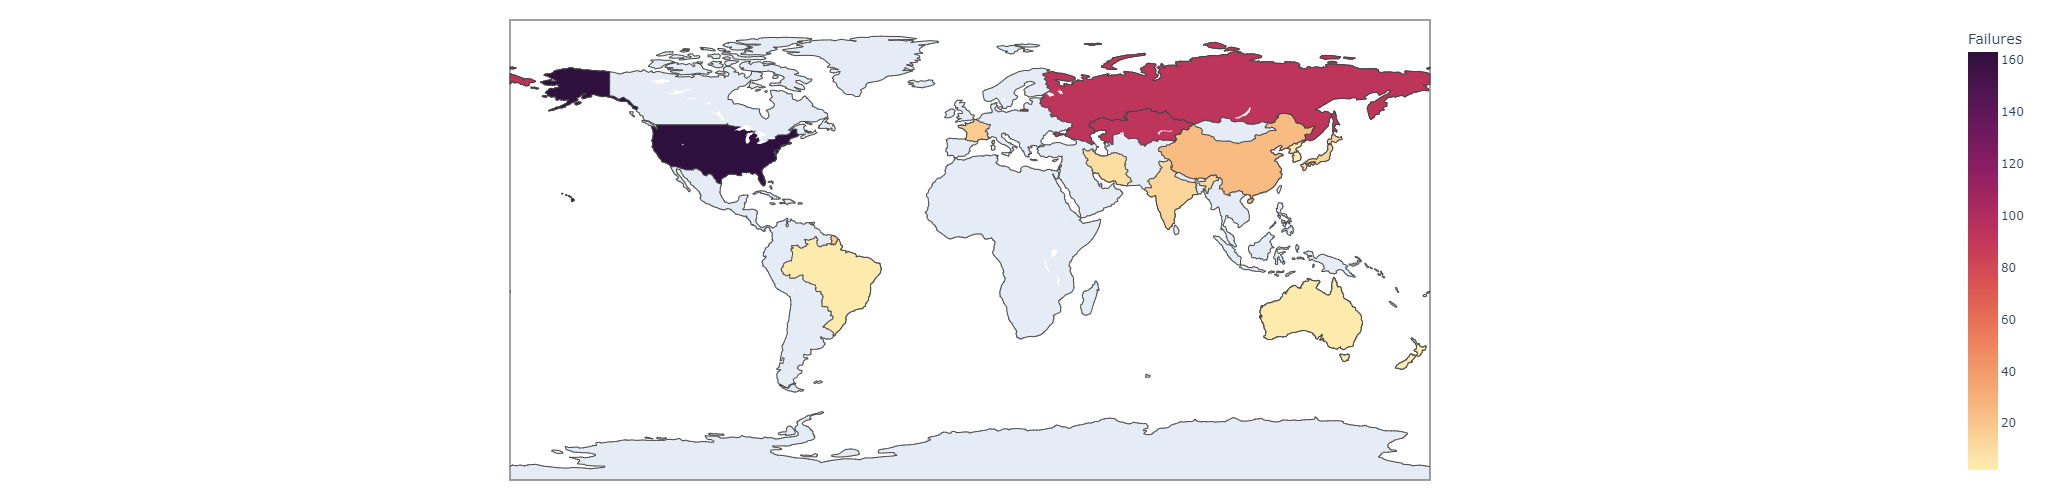

In [34]:
fig = px.choropleth(df_choropleth,
                    locations='ISO',
                    color='Failures',
                    hover_name='Country',
                    color_continuous_scale="matter",
                    width=1100,
                    height=500
                    )

fig.update_layout(margin={"r":20,"t":20,"l":20,"b":20})

fig.show()
                    

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [35]:
df_sunburst = df_data.groupby(['Country','Organisation', 'Mission_Status'], as_index=False).agg(Count=('Mission_Status', 'value_counts'))
df_sunburst

Country  Organisation   Mission_Status  Count
0    Australia          AMBA          Success      1
1    Australia        CECLES          Failure      2
2    Australia        CECLES          Success      1
3    Australia           RAE          Failure      1
4    Australia           RAE          Success      1
..         ...           ...              ...    ...
127        USA  US Air Force          Success    129
128        USA       US Navy          Failure     14
129        USA       US Navy  Partial Failure      1
130        USA       US Navy          Success      2
131        USA  Virgin Orbit          Failure      1

[132 rows x 4 columns]

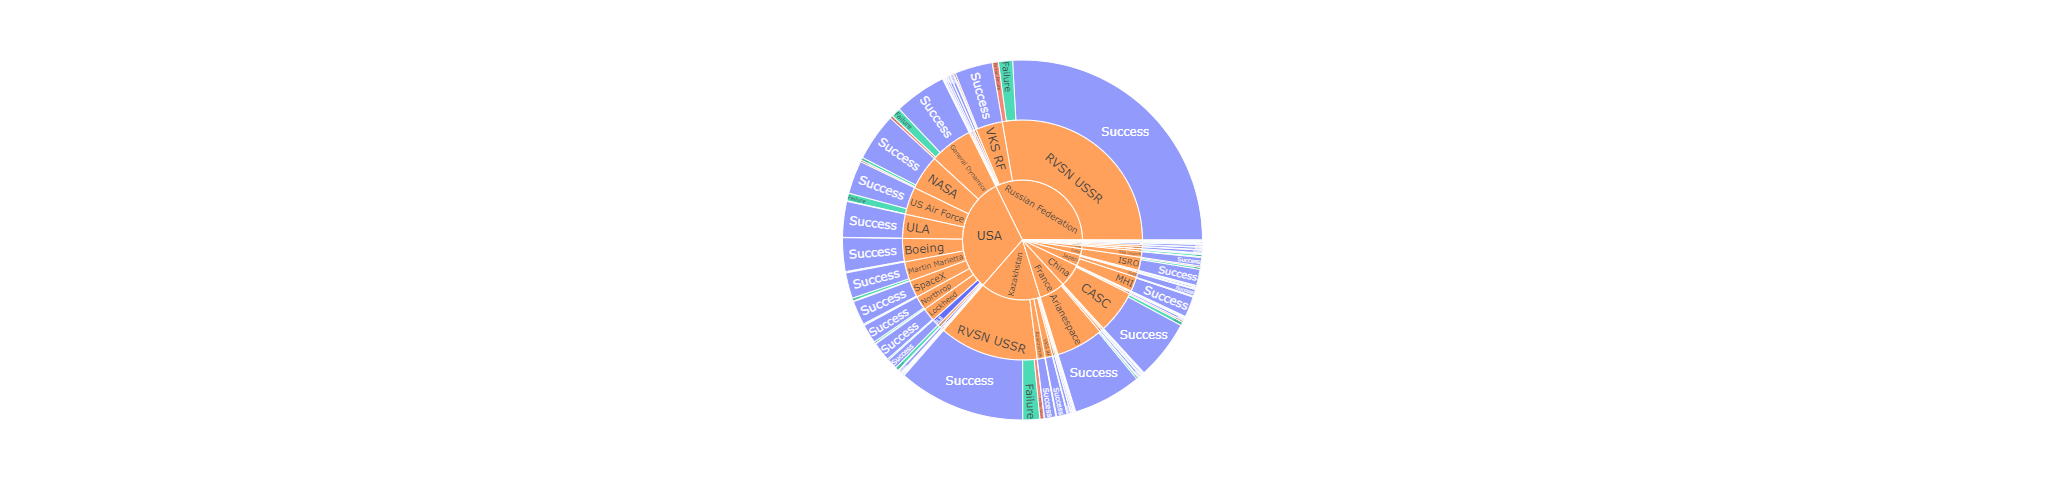

In [36]:
fig = px.sunburst(df_sunburst,
                  path=['Country', 'Organisation', 'Mission_Status'],
                  values='Count',
                  color='Mission_Status',
                  width=1000,
                  height=500)
fig.show()
                  

Straight away, we can see that RSVN USSR are the top organisation in terms of number of successful missions. So much so that Russian Federation and Kazakhstan are two of the three biggest portion of the chart. 
USA has the most parity in terms of organisations with many organisations having more than 100 successful missions. Surprisingly, NASA isn't number one, it's <b>General Dynamics!</b>

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [37]:
# groupby organisation and aggregate price
df_money = df_data.groupby('Organisation').agg({'Price': pd.Series.sum})
df_money.sort_values('Price', ascending=False).head(10)

Price
Organisation          
NASA         76,280.00
Arianespace  16,345.00
ULA          14,798.00
RVSN USSR    10,000.00
CASC          6,340.26
SpaceX        5,444.00
Northrop      3,930.00
MHI           3,532.50
ISRO          2,177.00
US Air Force  1,550.92

A familar name, NASA, at the top of the spending table. RVSN USSR, the Russian organisation with more than 6 times the number of missions compared to the second highest, Arianespace, is only the fourth biggest spender, how did they manage to spend so little per mission in comparison?

In [38]:
# check missions by RVSN USSR only
USSR_only = df_data[df_data['Organisation'] == 'RVSN USSR']
USSR_only.sort_values('Price', ascending=False).head()

Organisation                                      Location  \
1916    RVSN USSR  Site 110/37, Baikonur Cosmodrome, Kazakhstan   
2000    RVSN USSR     Site 250, Baikonur Cosmodrome, Kazakhstan   
1299    RVSN USSR        Site 41/1, Plesetsk Cosmodrome, Russia   
1427    RVSN USSR        Site 43/3, Plesetsk Cosmodrome, Russia   
1497    RVSN USSR        Site 43/3, Plesetsk Cosmodrome, Russia   

                          Date  \
1916 1988-11-15 03:00:00+00:00   
2000 1987-05-15 17:30:00+00:00   
1299 1998-08-12 12:53:00+00:00   
1427 1996-08-29 05:22:00+00:00   
1497 1995-08-02 23:59:00+00:00   

                                                 Detail  Rocket_Status  \
1916                             Energiya/Buran | Buran  StatusRetired   
2000             Energiya/Polyus | Polyus Space Station  StatusRetired   
1299             Molniya-M /Block ML | Molniya-1 n†­133  StatusRetired   
1427  Molniya-M /Block SO-L | Interbol 2, Magion5 & ...  StatusRetired   
1497      Molniya-M /Block SO-L | Interbol 1 & Magion 4  StatusRetired   

        Price Mission_Status             Country  ISO  
1916 5,000.00        Success          Kazakhstan  KAZ  
2000 5,000.00        Success          Kazakhstan  KAZ  
1299      NaN        Success  Russian Federation  RUS  
1427      NaN        Success  Russian Federation  RUS  
1497      NaN        Success  Russian Federation  RUS

In [39]:
USSR_only.Price.isna().value_counts()

True     1775
False       2
Name: Price, dtype: int64

Turns out only two of RVSN USSR's mission have non-null values in the <code>Price</code> column (at $5b each!). Based on the sheer number of missions, at 1,777, they should have the biggest spending but we have no way to confirm as the cost of almost all of their missions is not disclosed. 

In [40]:
NASA_only = df_data[df_data['Organisation'] == 'NASA']
NASA_only.Price.isna().value_counts()

False    149
True      54
Name: Price, dtype: int64

Similar issue here with NASA, 54 NaN values are a large portion of all NASA's missions in this dataset. To obtain a better estimate of money spent by organisation, we need to drop the null values and visualize from a smaller dataset.

# Analyse the Amount of Money Spent by Organisation per Launch

In [41]:
# New df with no null-values for Price
df_price_clean = df_data[['Organisation', 'Price']].dropna()
df_per_launch = df_price_clean.groupby('Organisation').agg({'Price': pd.Series.mean})

In [42]:
df_per_launch.sort_values('Price', ascending=False)[1:] # exclude the USSR which only have 2 non-null Price values (5,000m USD per mission)

Price
Organisation          
NASA            511.95
Boeing          177.29
Arianespace     170.26
ULA             151.00
ILS             101.54
MHI              95.47
Martin Marietta  80.16
US Air Force     59.65
JAXA             56.00
SpaceX           54.99
Roscosmos        51.63
Northrop         47.35
VKS RF           46.94
Eurockot         41.80
CASC             40.13
ESA              37.00
Lockheed         35.00
ISRO             32.49
Kosmotras        29.00
ExPace           28.30
EER              20.00
Sandia           15.00
Virgin Orbit     12.00
Rocket Lab        7.50

# Chart the Number of Launches per Year
Bar chart is a suitable choice to visualise this. We'll need to group the dataframe by year.

In [43]:
# extract the year from the Date column
df_data['Year'] = df_data['Date'].dt.year

# group the data by year
df_yearly = df_data.groupby('Year', as_index=False).agg(Mission_Count=('Year', 'count'))
df_yearly.head()

Year  Mission_Count
0  1957              3
1  1958             28
2  1959             20
3  1960             39
4  1961             52

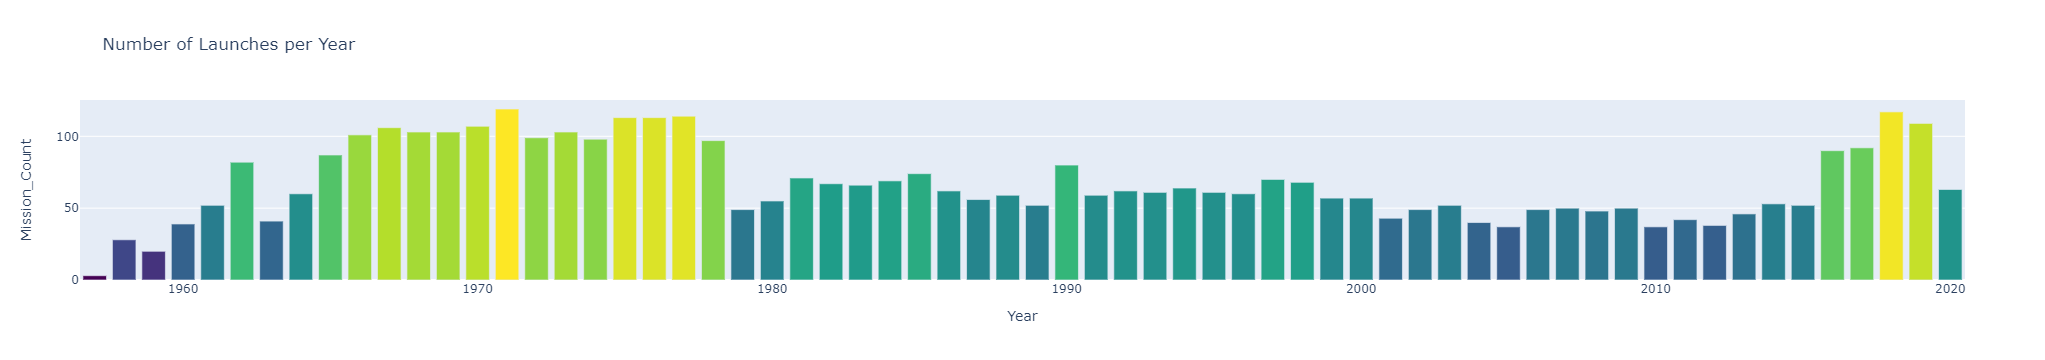

In [44]:
# plotly to plot the bar chart
bar = px.bar(df_yearly,
             x='Year',
             y='Mission_Count',
             color='Mission_Count',
             color_continuous_scale='Viridis',
             title='Number of Launches per Year')

bar.update_layout(coloraxis_showscale=False)
bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [115]:
# month-on-month
df_monthly = df_data.resample('M', on='Date').count()
df_monthly['Launches'] = df_monthly['Year']
df_monthly = df_monthly[['Launches']]
print(df_monthly)
# rolling average
df_roll = df_monthly.rolling(window=3).mean()

                           Launches
Date                               
1957-10-31 00:00:00+00:00         1
1957-11-30 00:00:00+00:00         1
1957-12-31 00:00:00+00:00         1
1958-01-31 00:00:00+00:00         0
1958-02-28 00:00:00+00:00         2
...                             ...
2020-04-30 00:00:00+00:00         5
2020-05-31 00:00:00+00:00         9
2020-06-30 00:00:00+00:00         7
2020-07-31 00:00:00+00:00        14
2020-08-31 00:00:00+00:00         3

[755 rows x 1 columns]


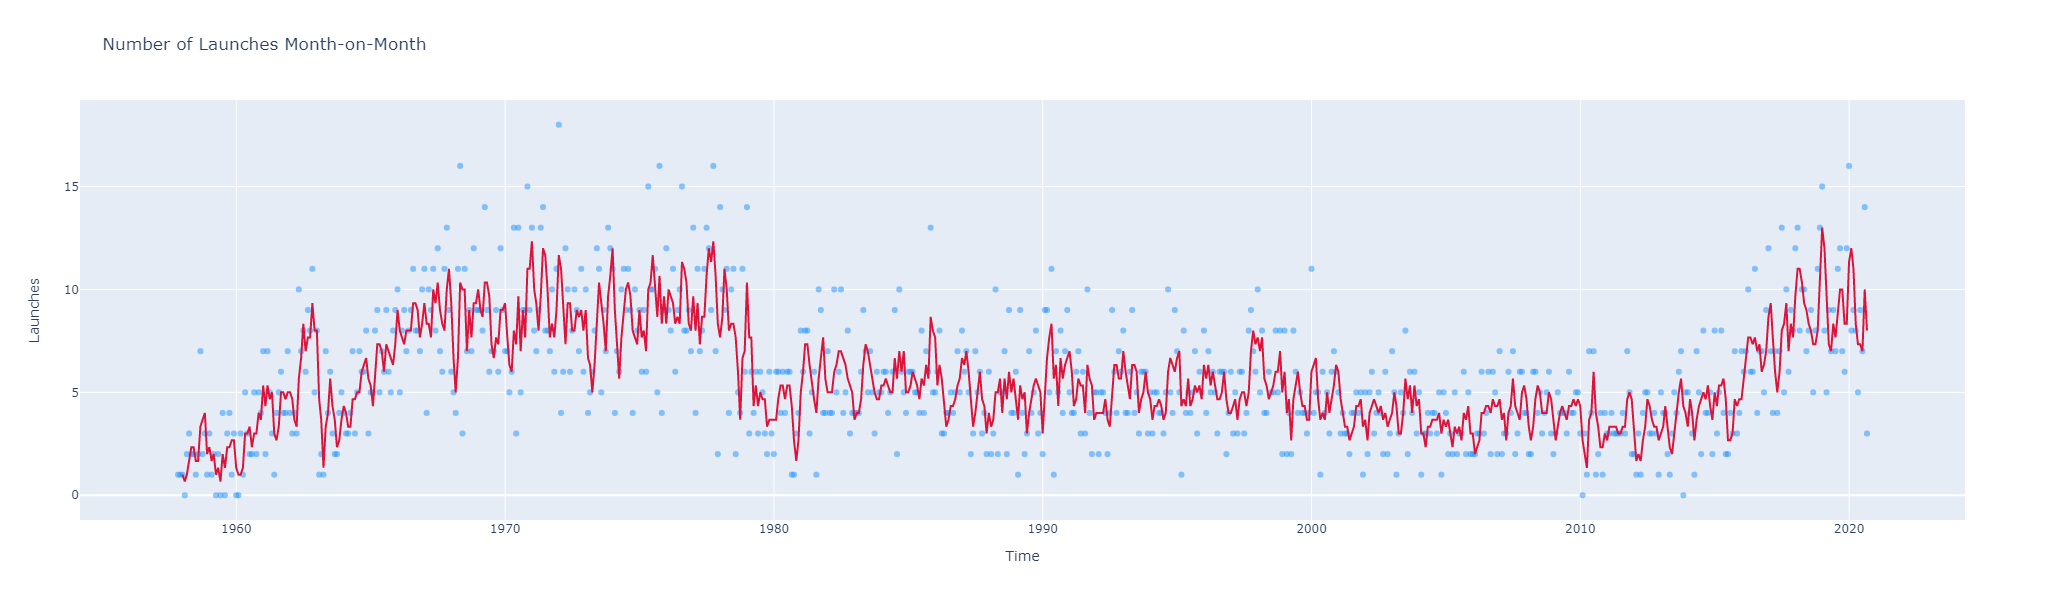

In [46]:
# plot the month-to-month
chart = px.scatter(x=df_monthly.index,
                   y=df_monthly.Launches,
                   color_discrete_sequence=['dodgerblue'],
                   opacity=0.5,
                   height=600,
                   title='Number of Launches Month-on-Month')
chart.update_layout(xaxis_title='Time',
                    yaxis_title='Launches')

# superimpose the rolling average
chart.add_trace(px.line(x=df_roll.index,
                        y=df_roll.Launches,
                        color_discrete_sequence=['crimson']).data[0])

chart.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [47]:
df_data['Month'] = df_data['Date'].dt.month

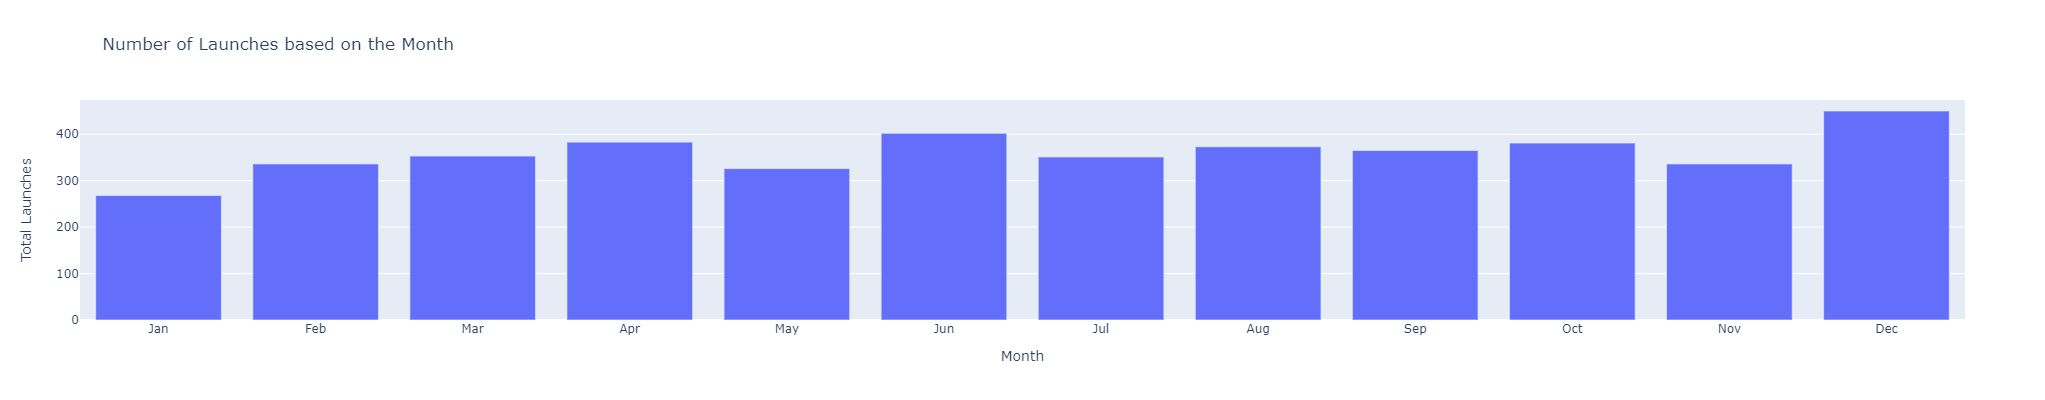

In [48]:
df_month = df_data.groupby('Month').agg(Total=('Month', 'count'))
df_month['Name'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# let's plot it in a bar chart
bar = px.bar(df_month,
             x='Name',
             y='Total',
             height=400,
             width=600,
             title='Number of Launches based on the Month')
bar.update_layout(xaxis_title='Month',
                  yaxis_title='Total Launches')
bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [49]:
df_povt = df_data[['Date', 'Price']]
df_povt = df_povt.resample('M', on='Date').mean()
df_povt.dropna(inplace=True) # drop NaN Price

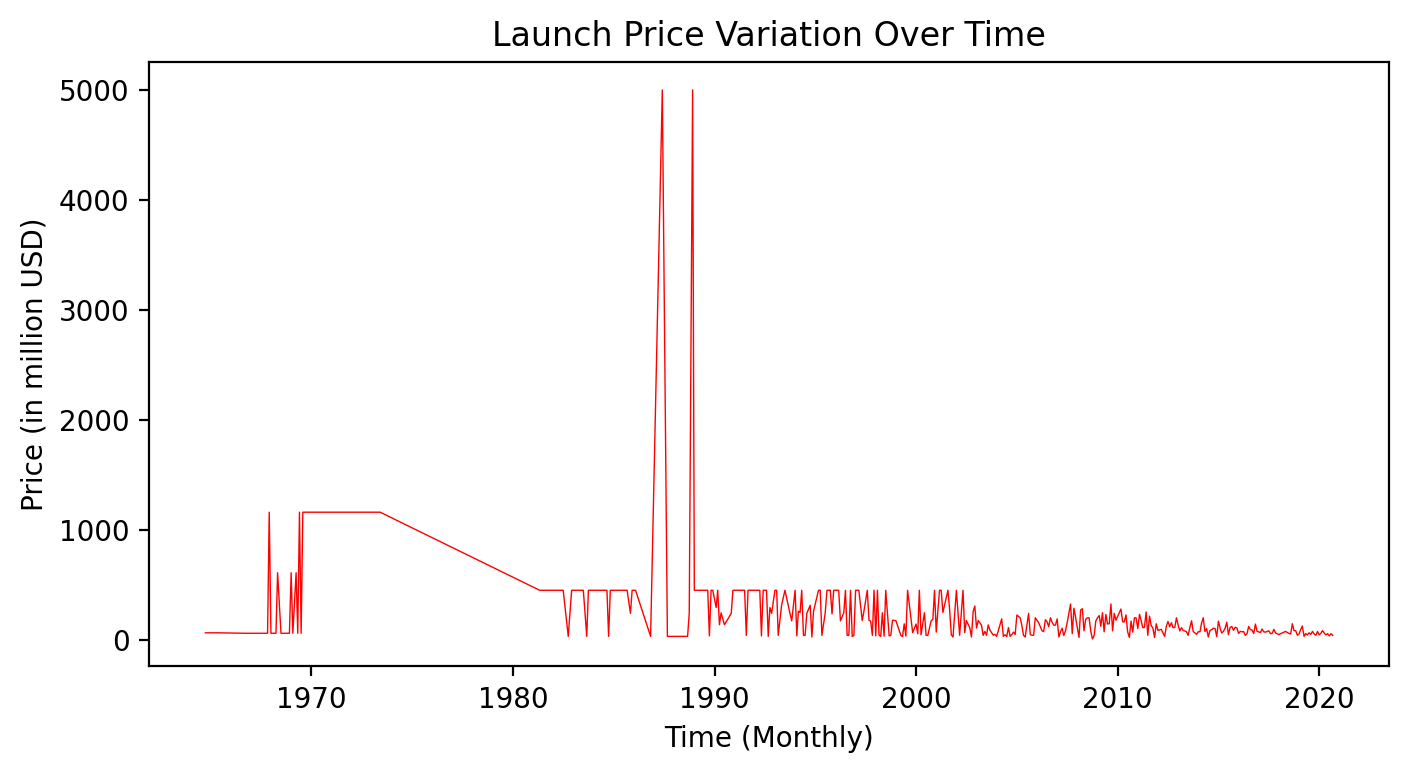

In [50]:
# plot line chart
plt.figure(figsize=(8,4), dpi=200)
plt.title('Launch Price Variation Over Time')
plt.plot(df_povt.index, df_povt.Price, 'r', linewidth=0.5)
plt.xlabel('Time (Monthly)')
plt.ylabel('Price (in million USD)')
plt.show()

Barring the two outliers spike near 1990, which is caused by those particular months having only a single rocket launch. The average price of launches doesn't seem to change that much. Space/rocket launches are tough and complex projects and it's entirely possible to have none or only 1 launch for any particular month. To capture better samples, let's try a 6-months average instead. 

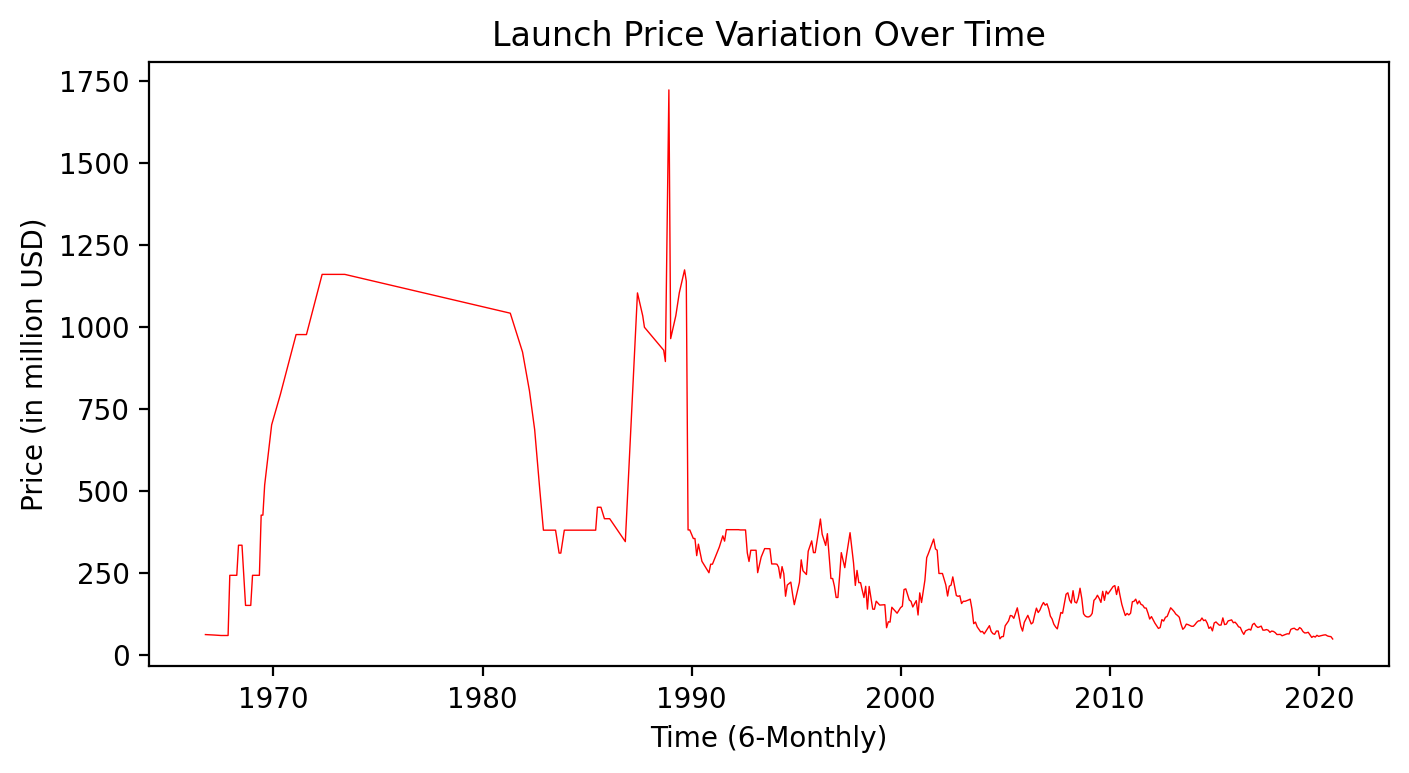

In [51]:
# rolling average of 6 months
df_povt_roll = df_povt.rolling(window=6).mean()
# plot line chart
plt.figure(figsize=(8,4), dpi=200)
plt.title('Launch Price Variation Over Time')
plt.plot(df_povt_roll.index, df_povt_roll.Price, 'r', linewidth=0.5)
plt.xlabel('Time (6-Monthly)')
plt.ylabel('Price (in million USD)')
plt.show()

Now we can see that the average price of rocket launches do have an observable trend, the price gradually dropped over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [52]:
top10_orgs = org_missions[:10].index #top 10 organisations

In [53]:
# group by relevant columns
df_org = df_data.groupby(['Date', 'Organisation'], as_index=False).agg(Launch=('Organisation', 'value_counts'))

# cumulative sum of the launch by organisation
df_org['Cumsum'] = df_org.groupby(['Organisation'])['Launch'].cumsum()
df_top10 = df_org.loc[df_org['Organisation'].isin(top10_orgs)]
df_top10.columns

Index(['Date', 'Organisation', 'Launch', 'Cumsum'], dtype='object')

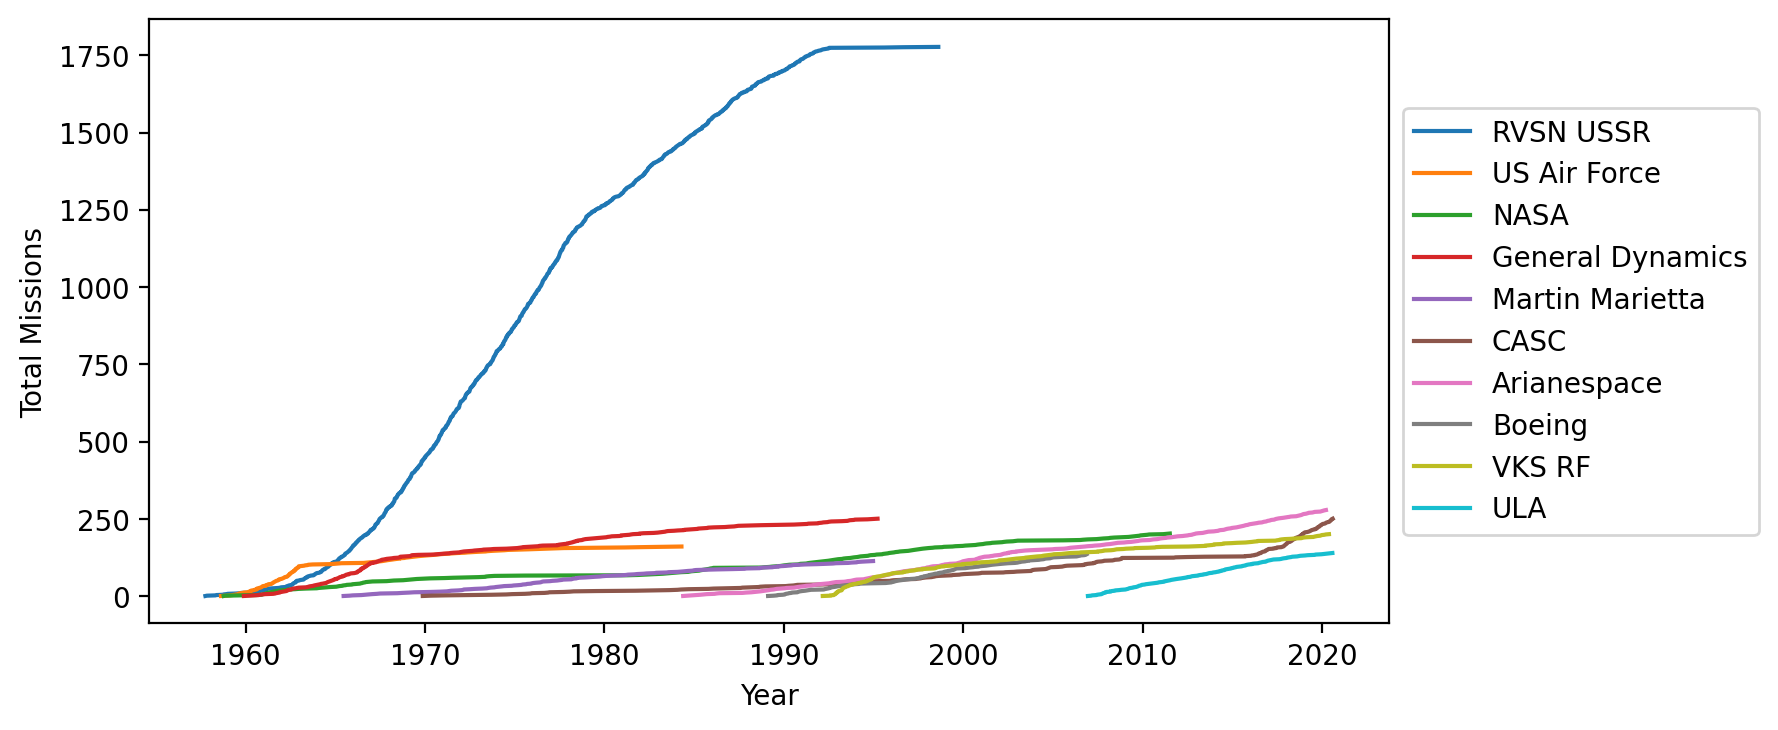

In [54]:
plt.figure(figsize=(8,4), dpi=200)
g = sns.lineplot(data=df_top10,
             x='Date',
             y='Cumsum',
             hue='Organisation')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year')
plt.ylabel('Total Missions')
plt.show()
             

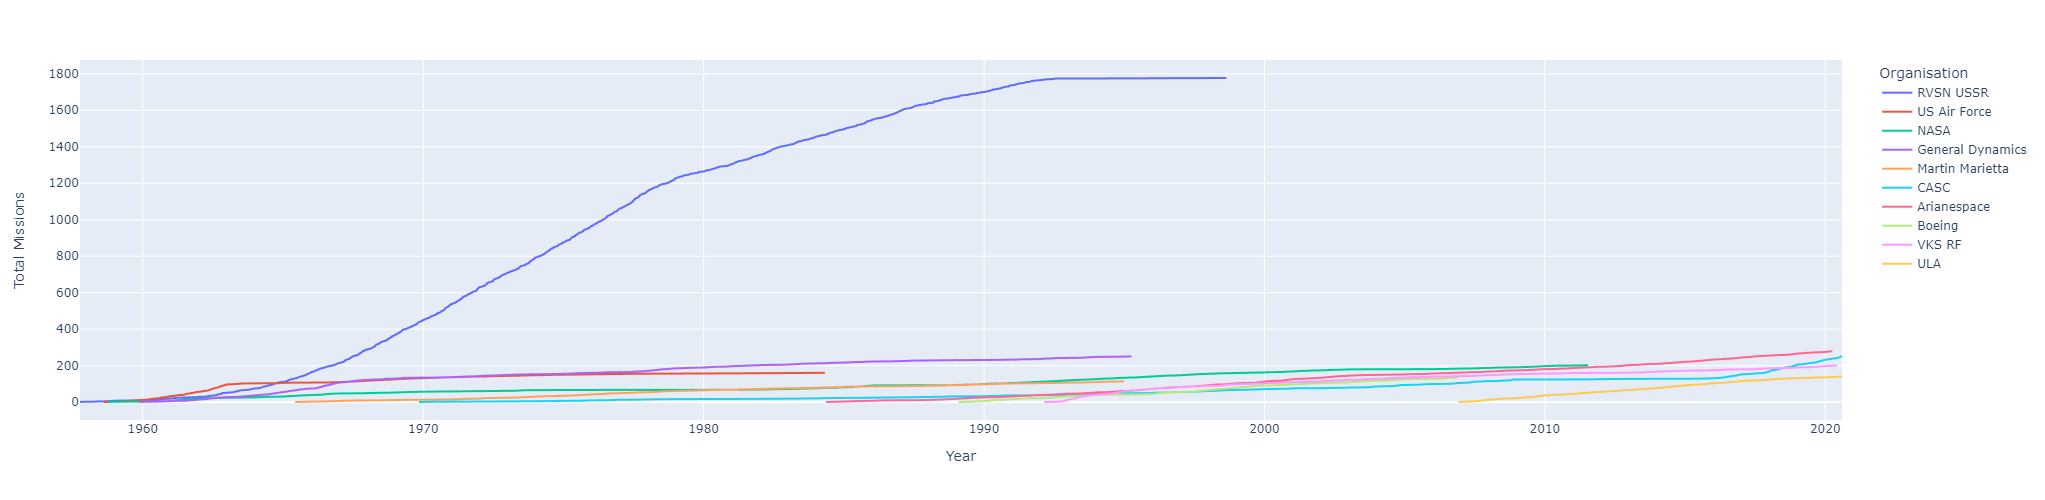

In [55]:
# line chart with plotly express
lines = px.line(df_top10,
                x='Date',
                y='Cumsum',
                color='Organisation',
                hover_name='Organisation',
                width=1000,
                height=500)

lines.update_layout(xaxis_title='Year',
                   yaxis_title='Total Missions')
lines.show()                

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [56]:
participants = ['USA', 'Russian Federation', 'Kazakhstan']
df = df_data.copy()
df_cold_war = df[(df.Date.dt.year < 1992) & (df['Country'].isin(participants))]
df_cold_war

Organisation                                      Location  \
1718         RVSN USSR  Site 175/58, Baikonur Cosmodrome, Kazakhstan   
1719          Yuzhmash        Site 32/2, Plesetsk Cosmodrome, Russia   
1721  General Dynamics     SLC-36B, Cape Canaveral AFS, Florida, USA   
1722  General Dynamics       SLC-3W, Vandenberg AFB, California, USA   
1723         RVSN USSR       Site 133/3, Plesetsk Cosmodrome, Russia   
...                ...                                           ...   
4319           US Navy      LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA      LC-26A, Cape Canaveral AFS, Florida, USA   
4321           US Navy      LC-18A, Cape Canaveral AFS, Florida, USA   
4322         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                          Date                                 Detail  \
1718 1991-12-20 00:00:00+00:00         Rokot/Briz K | GVM Demo Flight   
1719 1991-12-18 03:54:00+00:00  Tsyklon-3 | Intercosmos 25 & Magion 3   
1721 1991-12-07 22:47:00+00:00                Atlas II | Eutelsat 2F3   
1722 1991-11-28 13:23:00+00:00     Atlas-E/F Star-37S-ISS | DMSP F-11   
1723 1991-11-27 03:30:00+00:00       Cosmos-3M (11K65M) | Cosmos 2173   
...                        ...                                    ...   
4319 1958-02-05 07:33:00+00:00              Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00+00:00                    Juno I | Explorer 1   
4321 1957-12-06 16:44:00+00:00                Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00+00:00             Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00+00:00             Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status             Country  ISO  Year  \
1718  StatusRetired    NaN        Success          Kazakhstan  KAZ  1991   
1719  StatusRetired    NaN        Success  Russian Federation  RUS  1991   
1721  StatusRetired    NaN        Success                 USA  USA  1991   
1722  StatusRetired    NaN        Success                 USA  USA  1991   
1723  StatusRetired    NaN        Success  Russian Federation  RUS  1991   
...             ...    ...            ...                 ...  ...   ...   
4319  StatusRetired    NaN        Failure                 USA  USA  1958   
4320  StatusRetired    NaN        Success                 USA  USA  1958   
4321  StatusRetired    NaN        Failure                 USA  USA  1957   
4322  StatusRetired    NaN        Success          Kazakhstan  KAZ  1957   
4323  StatusRetired    NaN        Success          Kazakhstan  KAZ  1957   

      Month  
1718     12  
1719     12  
1721     12  
1722     11  
1723     11  
...     ...  
4319      2  
4320      2  
4321     12  
4322     11  
4323     10  

[2432 rows x 11 columns]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

C:\Users\61411\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



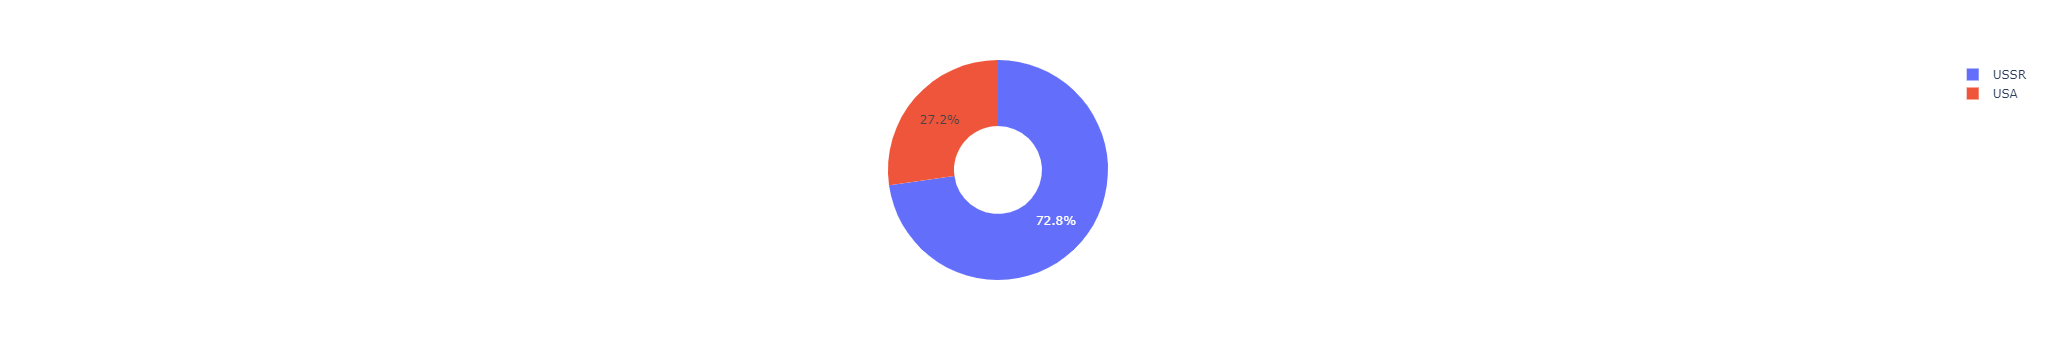

In [57]:
# combine Russia and Kazakhstan into USSR

ussr = ['Russian Federation', 'Kazakhstan']
cond = df_cold_war.Country.isin(ussr)
df_cold_war['Country'].loc[cond] = 'USSR'

df_total = df_cold_war.groupby('Country', as_index=False).agg(Total=('Country', 'count'))

fig = px.pie(df_total,
             values='Total',
             names='Country',
             hole=.4,
             height=300,
             width=600)
fig.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [58]:
total_yearly = df_cold_war.groupby(['Year', 'Country'], as_index=False).agg(Total=('Country', 'count'))

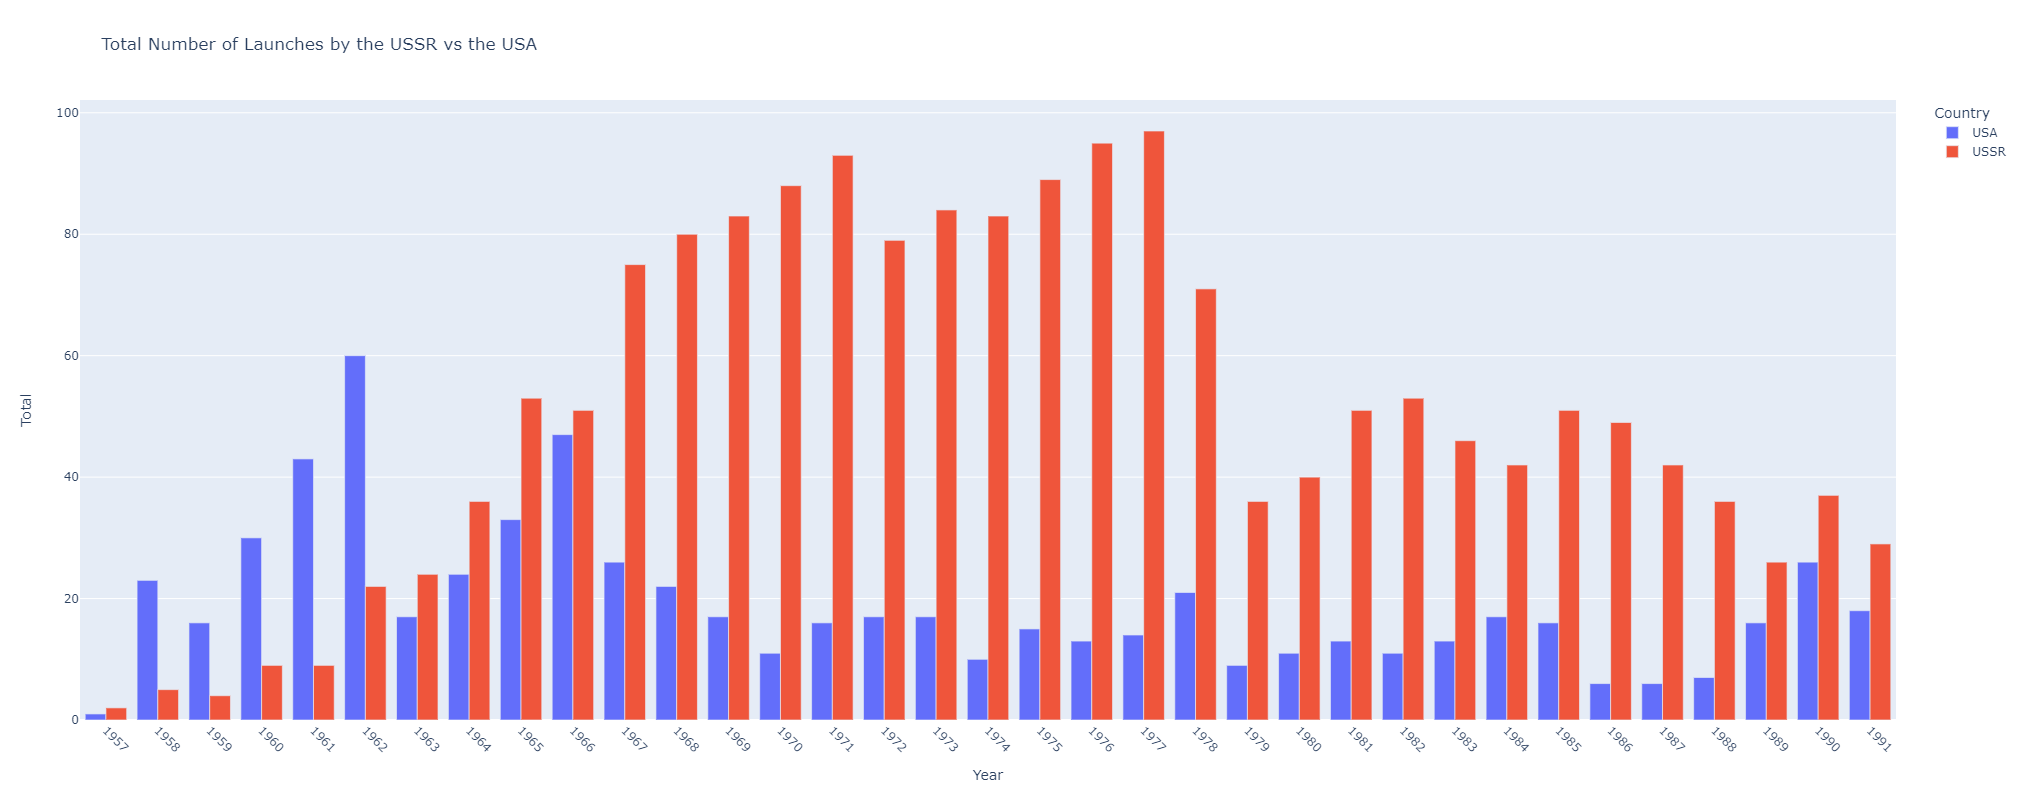

In [59]:
chart = px.bar(total_yearly,
               x='Year',
               y='Total',
               color='Country',
               barmode='group',
               height=800,
               width=2000,
               title='Total Number of Launches by the USSR vs the USA')
chart.update_xaxes(nticks=40, tickangle=45)
chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [60]:
df_failures = df_data.loc[df_data['Mission_Status']=='Failure']
df_failures.head()

Organisation                                           Location  \
11        ExPace    Site 95, Jiuquan Satellite Launch Center, China   
15    Rocket Lab    Rocket Lab LC-1A, M?hia Peninsula, New Zealand   
27  Virgin Orbit  Cosmic Girl, Mojave Air and Space Port, Califo...   
36          CASC       LC-2, Xichang Satellite Launch Center, China   
43          CASC    LC-201, Wenchang Satellite Launch Center, China   

                        Date                                       Detail  \
11 2020-07-10 04:17:00+00:00   Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2   
15 2020-07-04 21:19:00+00:00  Electron/Curie | Pics Or It Didn??¦t Happen   
27 2020-05-25 19:50:00+00:00                    LauncherOne | Demo Flight   
36 2020-04-09 11:46:00+00:00              Long March 3B/E | Nusantara Dua   
43 2020-03-16 13:34:00+00:00                        Long March 7A | XJY-6   

   Rocket_Status  Price Mission_Status      Country  ISO  Year  Month  
11  StatusActive  28.30        Failure        China  CHN  2020      7  
15  StatusActive   7.50        Failure  New Zealand  NZL  2020      7  
27  StatusActive  12.00        Failure          USA  USA  2020      5  
36  StatusActive  29.15        Failure        China  CHN  2020      4  
43  StatusActive    NaN        Failure        China  CHN  2020      3

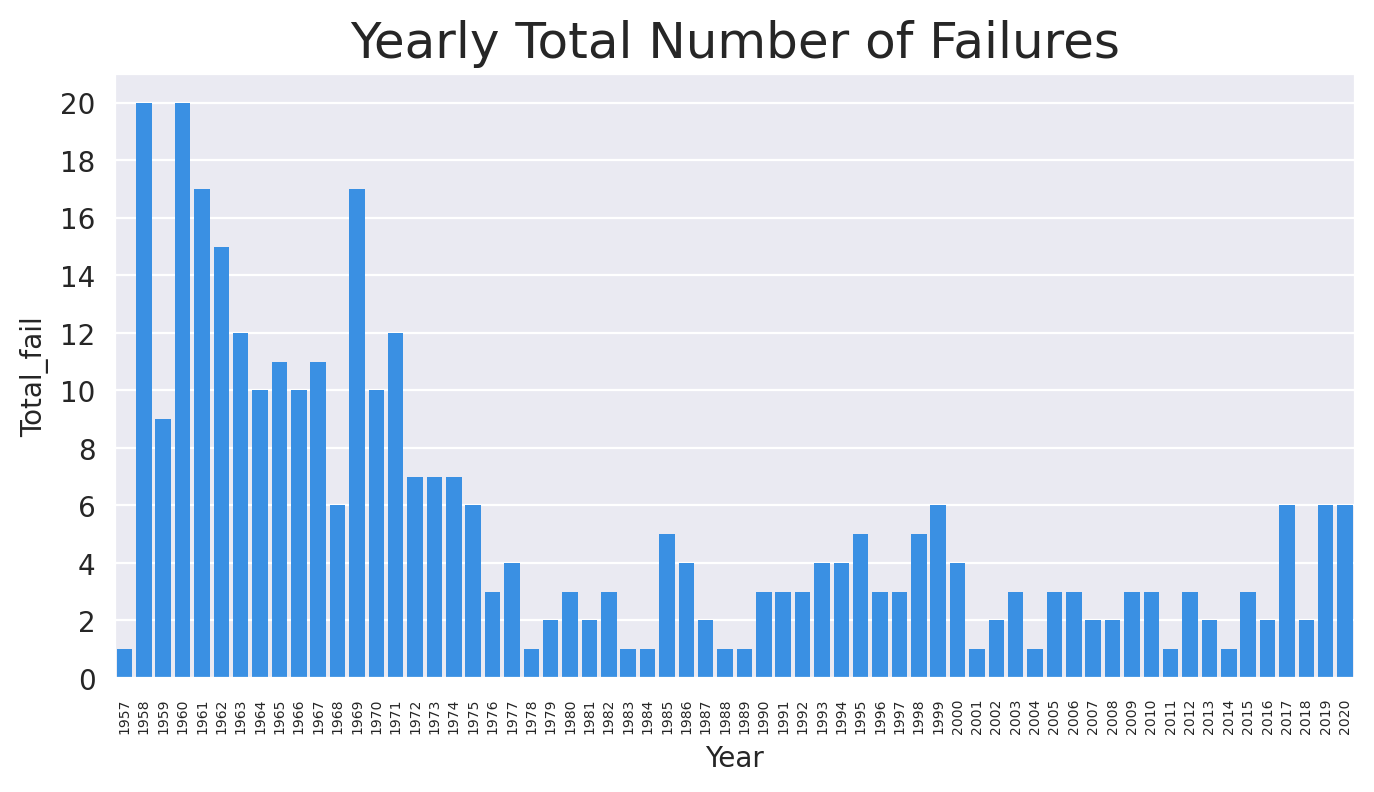

In [61]:
# chart yearly total failures
df_yearly_fail = df_failures.groupby('Year', as_index=False).agg(Total_fail=('Mission_Status', 'count'))

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.barplot(data=df_yearly_fail,
                x='Year',
                y='Total_fail',
                color='dodgerblue',
                linewidth=0)
plt.xticks(rotation=90, fontsize=5)
plt.yticks(np.arange(0, 21, 2))
plt.title('Yearly Total Number of Failures', fontsize=18)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [62]:
df_pct_fail = df_yearly.merge(df_yearly_fail, on='Year')
df_pct_fail['pct_fail'] = df_pct_fail.Total_fail / df_pct_fail.Mission_Count

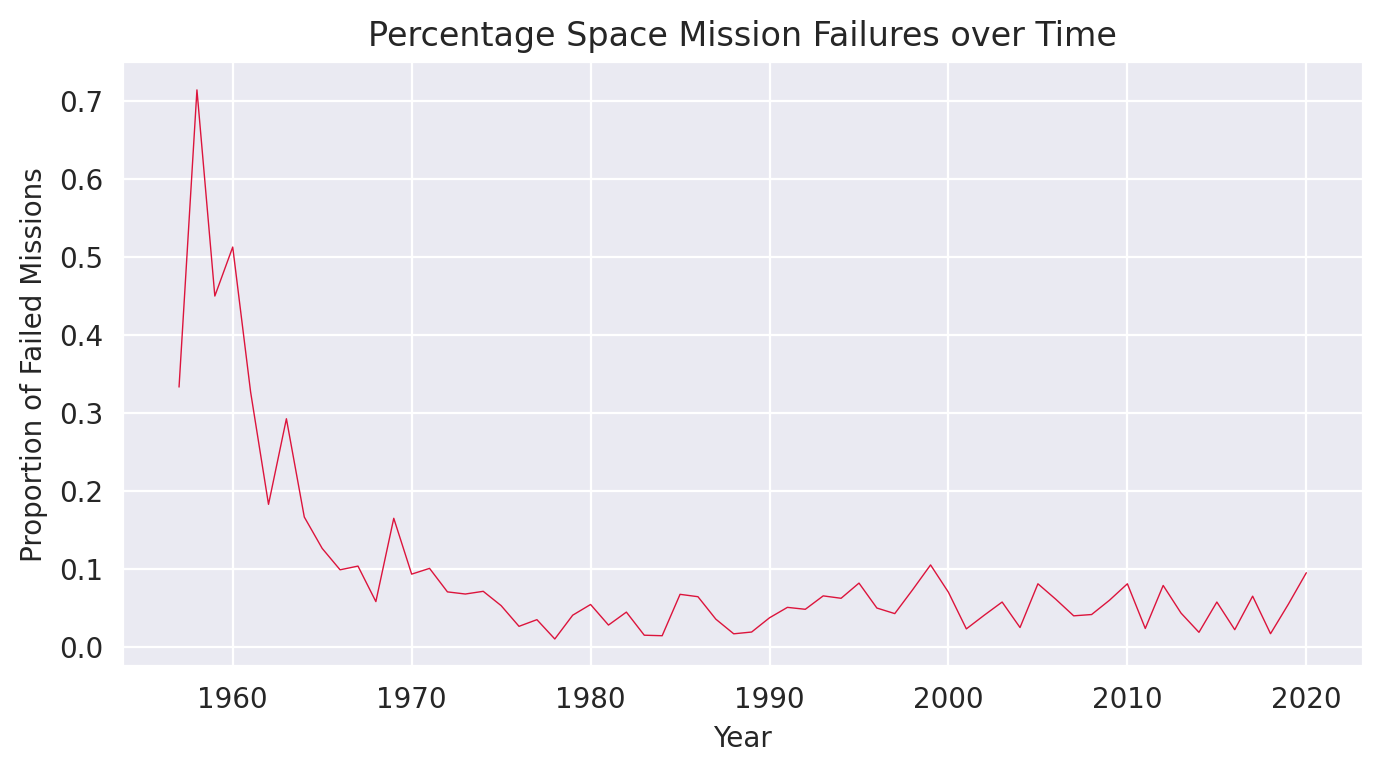

In [63]:
# plot
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.lineplot(data=df_pct_fail,
                 x='Year',
                 y='pct_fail',
                 color='crimson',
                 linewidth=0.5)
plt.title('Percentage Space Mission Failures over Time')
plt.ylabel('Proportion of Failed Missions')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches? 

In [85]:
# look at total launches
df_yearly_country = df_data.groupby(['Year', 'Country'], as_index=False).agg(country_total=('Country', 'count'))
print(df_yearly_country.head(10))

   Year             Country  country_total
0  1957          Kazakhstan              2
1  1957                 USA              1
2  1958          Kazakhstan              5
3  1958                 USA             23
4  1959          Kazakhstan              4
5  1959                 USA             16
6  1960          Kazakhstan              9
7  1960                 USA             30
8  1961          Kazakhstan              7
9  1961  Russian Federation              2


In [71]:
def yearly_top(year):
    """Return the country with the most number of launches for that year"""
    most_launch = df_yearly_country['country_total'].loc[df_yearly_country.Year==year].max()
    the_country = df_yearly_country.Country.loc[(df_yearly_country.Year == year) &\
                                                (df_yearly_country.country_total == most_launch)].values[0]
    return the_country

# loop through years
year_list = list(range(1957, 2021))
country_list = []
for year in range(1957, 2021):
    country_list.append(yearly_top(year))


df_top_yearly = pd.DataFrame(data=country_list, index=year_list, columns=['Lead_Country'])
df_top_yearly

Lead_Country
1957          Kazakhstan
1958                 USA
1959                 USA
1960                 USA
1961                 USA
1962                 USA
1963                 USA
1964          Kazakhstan
1965          Kazakhstan
1966                 USA
1967          Kazakhstan
1968          Kazakhstan
1969  Russian Federation
1970  Russian Federation
1971  Russian Federation
1972  Russian Federation
1973  Russian Federation
1974  Russian Federation
1975  Russian Federation
1976  Russian Federation
1977  Russian Federation
1978  Russian Federation
1979  Russian Federation
1980  Russian Federation
1981  Russian Federation
1982  Russian Federation
1983  Russian Federation
1984  Russian Federation
1985  Russian Federation
1986  Russian Federation
1987  Russian Federation
1988  Russian Federation
1989  Russian Federation
1990  Russian Federation
1991  Russian Federation
1992                 USA
1993                 USA
1994                 USA
1995                 USA
1996                 USA
1997                 USA
1998                 USA
1999                 USA
2000                 USA
2001                 USA
2002                 USA
2003                 USA
2004                 USA
2005                 USA
2006                 USA
2007                 USA
2008                 USA
2009                 USA
2010                 USA
2011                 USA
2012                 USA
2013                 USA
2014                 USA
2015                 USA
2016                 USA
2017                 USA
2018               China
2019               China
2020               China

In [83]:
# look at successful launches
df_success = df_data.loc[df_data.Mission_Status == 'Success'].groupby(['Year', 'Country'], as_index=False).agg(success_total=('Country', 'count'))
print(df_success.head())

# loop through years
most_success = []
for year in range(1957, 2021):
    most_success.append(yearly_top(year))

df_success_yearly = pd.DataFrame(data=most_success, index=year_list, columns=['Lead_Country'])
df_success_yearly

   Year     Country  success_total
0  1957  Kazakhstan              2
1  1958  Kazakhstan              1
2  1958         USA              5
3  1959  Kazakhstan              2
4  1959         USA              6


Lead_Country
1957          Kazakhstan
1958                 USA
1959                 USA
1960                 USA
1961                 USA
1962                 USA
1963                 USA
1964          Kazakhstan
1965          Kazakhstan
1966                 USA
1967          Kazakhstan
1968          Kazakhstan
1969  Russian Federation
1970  Russian Federation
1971  Russian Federation
1972  Russian Federation
1973  Russian Federation
1974  Russian Federation
1975  Russian Federation
1976  Russian Federation
1977  Russian Federation
1978  Russian Federation
1979  Russian Federation
1980  Russian Federation
1981  Russian Federation
1982  Russian Federation
1983  Russian Federation
1984  Russian Federation
1985  Russian Federation
1986  Russian Federation
1987  Russian Federation
1988  Russian Federation
1989  Russian Federation
1990  Russian Federation
1991  Russian Federation
1992                 USA
1993                 USA
1994                 USA
1995                 USA
1996                 USA
1997                 USA
1998                 USA
1999                 USA
2000                 USA
2001                 USA
2002                 USA
2003                 USA
2004                 USA
2005                 USA
2006                 USA
2007                 USA
2008                 USA
2009                 USA
2010                 USA
2011                 USA
2012                 USA
2013                 USA
2014                 USA
2015                 USA
2016                 USA
2017                 USA
2018               China
2019               China
2020               China

The countries that lead in the year for total number of missions also lead in total successful missions. 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [91]:
df_org_most = df_data.groupby(['Year', 'Organisation'], as_index=False).agg(total_launches=('Organisation','count'))
df_org_most.head(10)

Year      Organisation  total_launches
0  1957         RVSN USSR               2
1  1957           US Navy               1
2  1958              AMBA               7
3  1958              NASA               2
4  1958         RVSN USSR               5
5  1958      US Air Force               2
6  1958           US Navy              12
7  1959  General Dynamics               1
8  1959              NASA               1
9  1959         RVSN USSR               4

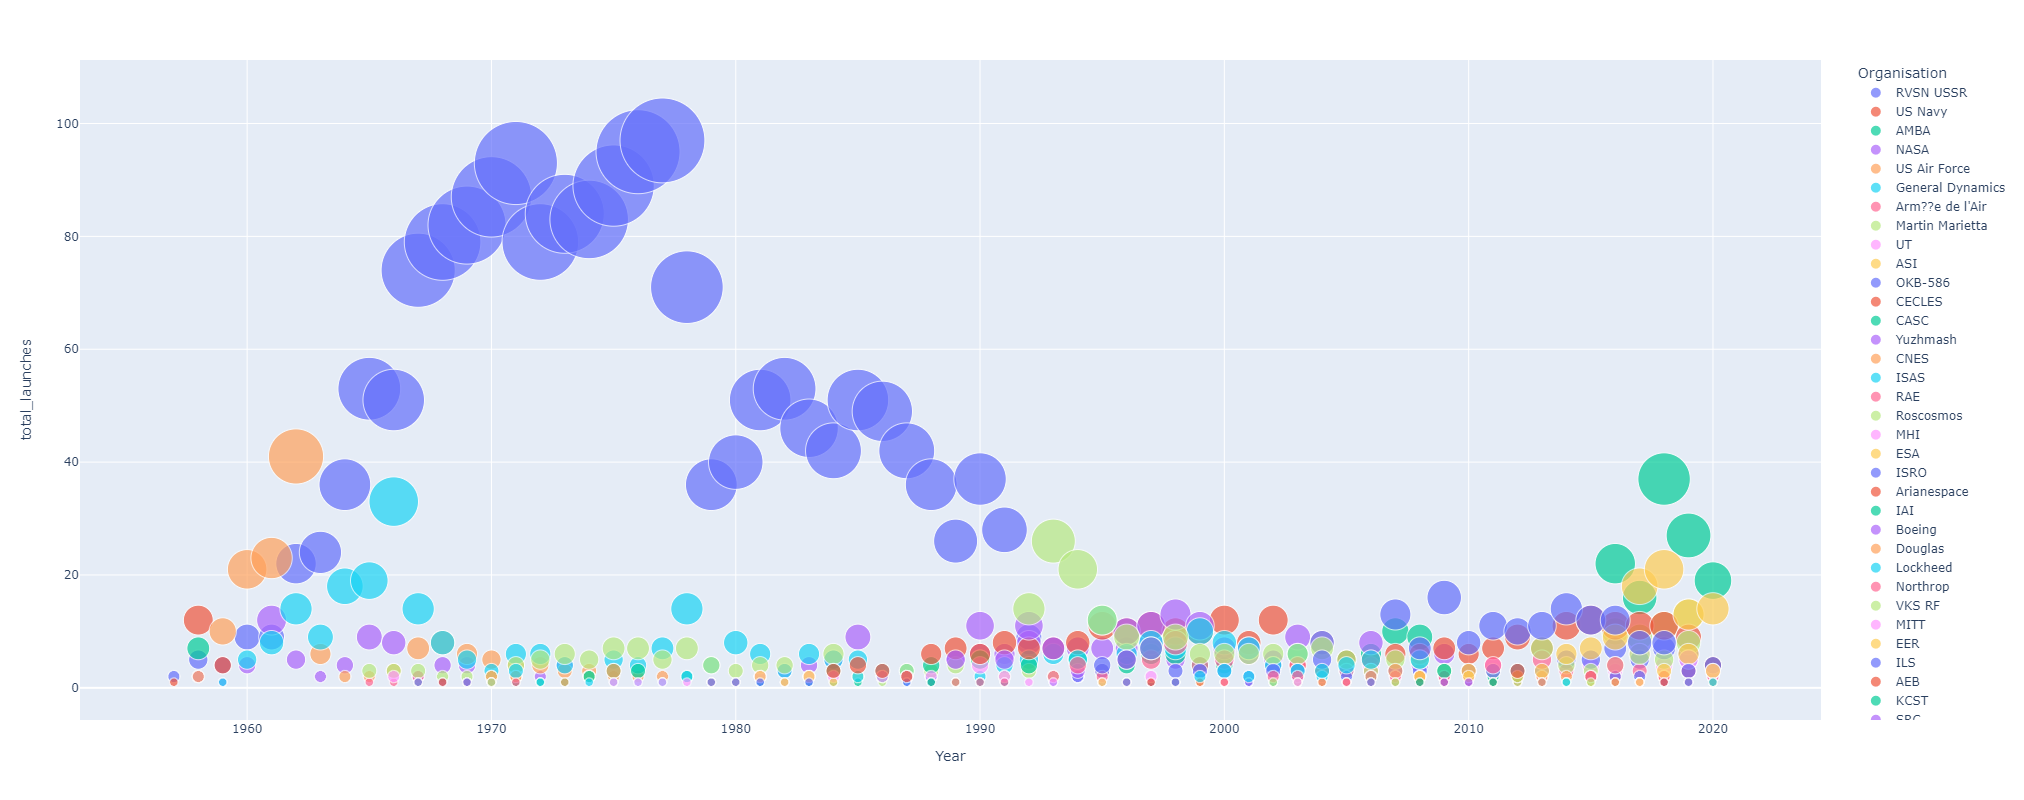

In [114]:
fig = px.scatter(df_org_most,
                 x='Year',
                 y='total_launches',
                 size='total_launches',
                 color='Organisation',
                 hover_name='Organisation',
                 size_max=60,
                 width=1500,
                 height=800)

fig.show()

The USSR was by far the most dominant organisation for all of 1970s and 1980s. In recent years (2018-2020), the CASC and SpaceX are the top two organisations.  